# **Using KNN(K-Nearest Neighbors) to solve Iris Dataset issue**

The primary goal of this article is to showcase best practices for solving problems using the supervised machine learning algorithm, K-Nearest Neighbors (KNN).

For this purpose, we utilize the IRIS dataset, a popular choice among data scientists for testing and exploring machine learning concepts. Notably, this dataset is readily available in widely-used libraries such as Scikit-Learn and Seaborn.

# **Iris Dataset*** Iris is a genus of flowering plants known for their strikingly showy flowers.
* The three iris species studied here—setosa, versicolor, and virginica—share a similar color palette of dark violet or blue.
* One way to visually differentiate these species is by examining the dimensions of their petals and sepals, specifically their length and width.h).

> **The first step is to import _Seaborn_ Library and then load the iris dataset from it.**

Unlike Scikit-Learn, which loads the dataset as arrays, Seaborn provides it as a Pandas DataFrame. This eliminates the need for additional steps to create a DataFrame, saving both time and lines of code.s.

In [14]:
import seaborn as sns 
iris = sns.load_dataset('iris')

In [16]:
type(iris)

pandas.core.frame.DataFrame

In [20]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,versicolor
72,6.3,2.5,4.9,1.5,versicolor
133,6.3,2.8,5.1,1.5,virginica
135,7.7,3.0,6.1,2.3,virginica
140,6.7,3.1,5.6,2.4,virginica


The dataset includes four categories: sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm).

To better understand the dataset look to the picture below.

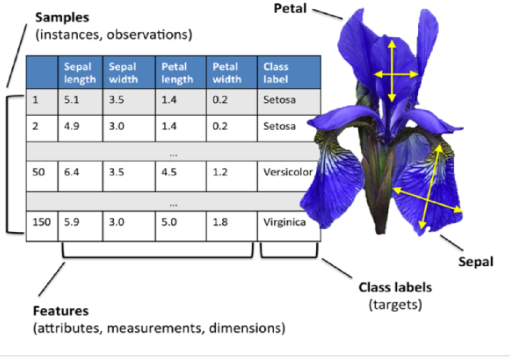

In [47]:
from IPython.display import Image
Image(filename ="iris.png", width=500, height=350)

In [28]:
import pandas as pd
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

The dataset consists of 150 flowers, with 50 samples from each species.

> **Basic statistical characteristics of the numeric columns**

The **describe** method provides key statistics for each feature, including the mean, standard deviation, minimum, maximum, and percentiles.


In [32]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


While it is clear how each feature contrasts with the others, the data for all three species are currently combined. A graphical representation would be more suitable for an exploratory analysis.

The **info** method provides additional details about the DataFrame, including the data type of each column:

* Features with dimensions of type float64
* The target variable (species) of type object

In [36]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The **isnull** method, when combined with **sum**, checks for any missing values in the DataFrame. If any null values are found, they need to be addressed, as their presence could prevent the application of machine learning algorithms.



In [41]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# **Exploratory Analysis through Charts**

**Seaborn** is a Python data visualization library built on top of **Matplotlib**. It offers a high-level interface for creating visually appealing and insightful statistical graphics.

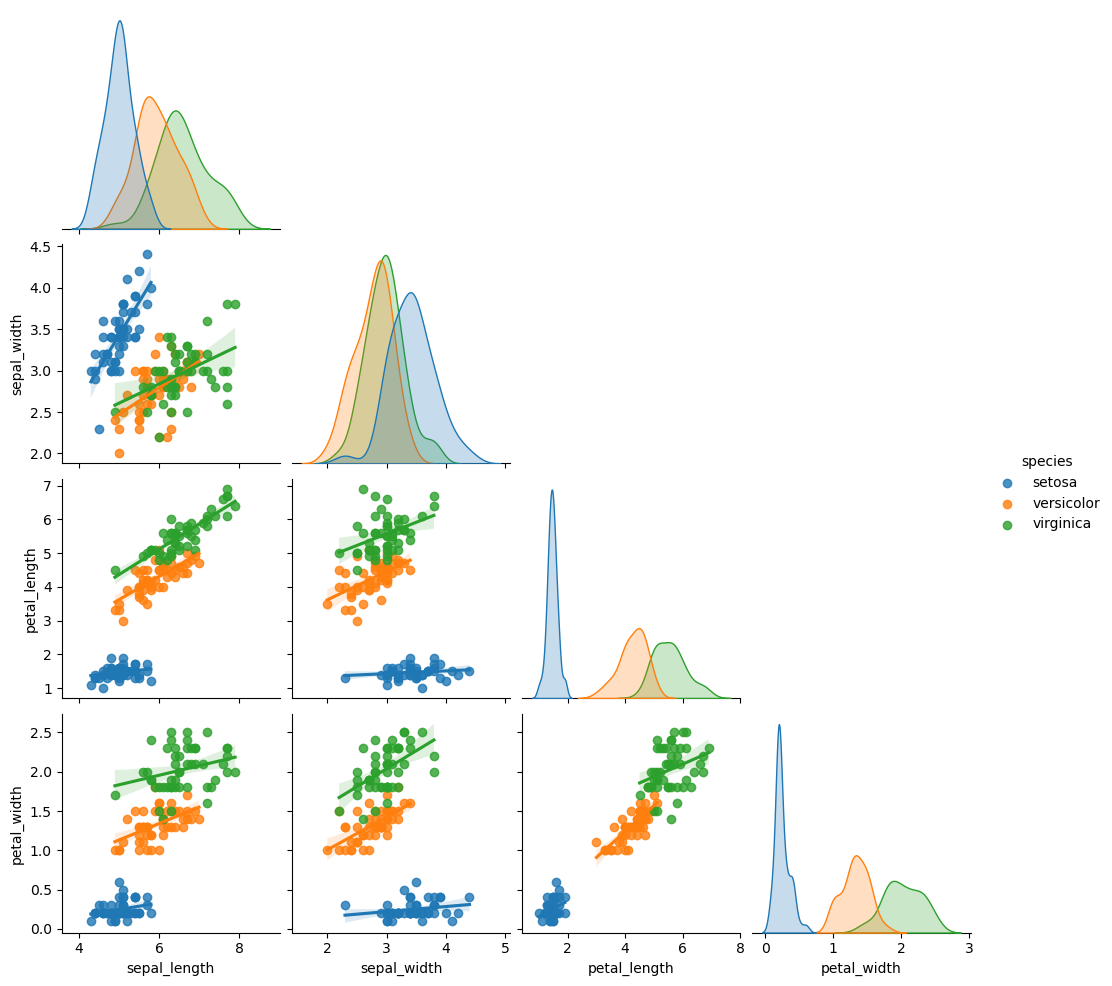

In [51]:
import warnings
warnings.filterwarnings(action = 'ignore')

sns.pairplot(iris, hue="species", corner=True, kind='reg')

> ## **Setosa Identification**

The species **Iris-setosa**, **Iris-virginica**, and **Iris-versicolor** all share a similar violet/blue color (though I can't personally distinguish between them). One effective way to differentiate these species is by analyzing their petal and sepal dimensions, as well as the proportions between them. An exploratory analysis of the data reveals valuable insights and potential conclusions.

As shown in the charts above, the data for **Iris-setosa** is clearly distinguishable from the other two species. With such a distinct data distribution, a well-performing machine learning algorithm should achieve high accuracy—potentially even 100%. In fact, for classifying Iris-setosa against the other two species, **simply checking the petal dimensions could suffice**. If the petal length is up to 2 cm or the petal width is up to 0.7 cm, it is almost certainly Iris-setosa.

In [55]:
print('Setosa maximum petal length in this dataset sample is', iris.loc[iris.species=='setosa'].max().petal_length, 'cm, as the other species the minimum is', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length, 'cm.\nAbout the petal width, setosa maximun is', iris.loc[iris.species=='setosa'].max().petal_width, 'cm, and the other species minimum is', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width, 'cm.')

Setosa maximum petal length in this dataset sample is 1.9 cm, as the other species the minimum is 3.0 cm.
About the petal width, setosa maximun is 0.6 cm, and the other species minimum is 1.0 cm.


In [57]:
from IPython.display import display
p_l = pd.pivot_table(iris, values=['petal_length'], index=['species'],aggfunc=[min,max], margins=False)
p_w = pd.pivot_table(iris, values=['petal_width'], index=['species'],aggfunc=[min,max], margins=False)
P_L = pd.DataFrame(p_l.to_records())
P_W = pd.DataFrame(p_w.to_records())
display(P_L),display(P_W)

,species,"('min', 'petal_length')","('max', 'petal_length')"
0,setosa,1.0,1.9
1,versicolor,3.0,5.1
2,virginica,4.5,6.9


,species,"('min', 'petal_width')","('max', 'petal_width')"
0,setosa,0.1,0.6
1,versicolor,1.0,1.8
2,virginica,1.4,2.5


(None, None)

In [59]:
s_l = pd.pivot_table(iris, values=['sepal_length'], index=['species'],aggfunc=[min,max], margins=False)
s_w = pd.pivot_table(iris, values=['sepal_width'], index=['species'],aggfunc=[min,max], margins=False)
S_L = pd.DataFrame(s_l.to_records())
S_W = pd.DataFrame(s_w.to_records())
display(S_L),display(S_W)

,species,"('min', 'sepal_length')","('max', 'sepal_length')"
0,setosa,4.3,5.8
1,versicolor,4.9,7.0
2,virginica,4.9,7.9


,species,"('min', 'sepal_width')","('max', 'sepal_width')"
0,setosa,2.3,4.4
1,versicolor,2.0,3.4
2,virginica,2.2,3.8


(None, None)

> ## **Virginica and Versicolor Identification**

The data for **iris-versicolor** and **iris-virginica** are closely clustered, but there is a distinct, normal distribution for all their dimensions, except for the sepal width, which is almost identical for both species. As a result, these species can be differentiated with a high degree of accuracy based on the following relationships:s:

*   Petal Length **vs** Sepal Length or Sepal Width
*   Petal Width **vs** Sepal  Width or Sepal Width or Petal Length

The only relationship that is almost the same, and could not, through an exploratory analysis conclude which specie is between this two, as the dimensions and proportion between length an are very similarsame is:

*   Sepal Length **vs** Sepal Width

An algorithm of Machine Learning is of great use for this classification, reducing any human mistake when comparing all this dimensions and relharacteristics.

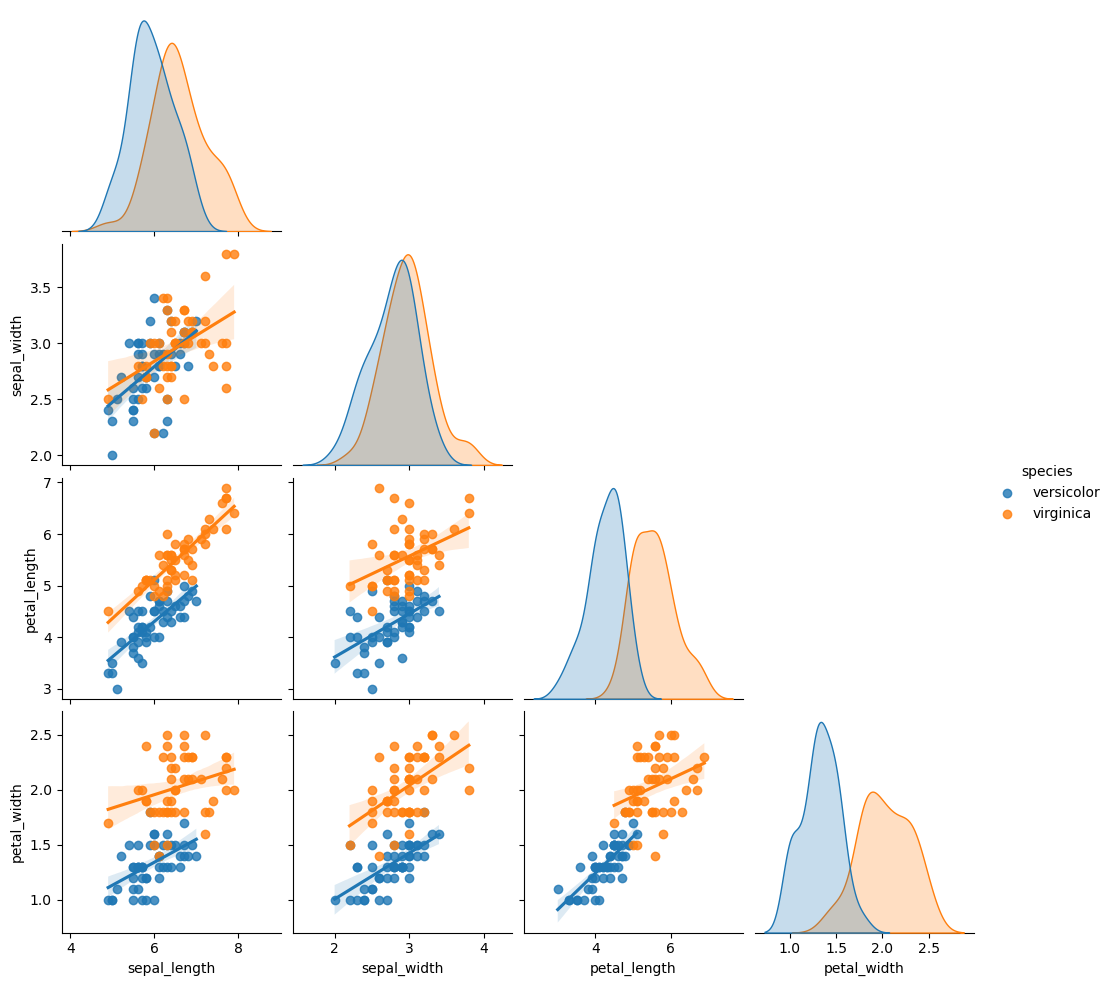

In [64]:
sns.pairplot(iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')], hue="species", corner=True, kind='reg')

It is clear that most of the flowers can be easily identified by their species, but a few may pose a challenge. Why not use machine learning to assist with this task?

# **MACHINE LEARNING - Predictive Analysis**

After performing the exploratory analysis, the goal is essentially to evaluate the data and draw conclusions by examining the distribution and scatter of the data.

Now, the predictive analysis will be performed not manually, but with the assistance of a computer and mathematical algorithms through **machine learning**.

The problem will be solved using the **KNN** algorithm, and best practices will be applied and explained.

Scikit-learn is the Python library used for machine learning, and various modules are imported from it as needed.

> *Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.*

## **TRAIN and TEST Data**


The first step in performing predictive analysis using a machine learning algorithm is to split the data into two parts. One part is used for **training**, where the coefficients are calculated to best fit the data according to the chosen algorithm. The second part is reserved for **testing**, allowing you to **evaluate the accuracy** of the method using different data, which helps ensure that the model can generalize to unseen data.

> This selection, of which part of the data is to be used as train and test is very important. We are going to use **70% as train** and **30% as test**. It is safe not to pick any skewed data to make it randomly. 

> ***Scikit-learn*** has a very good method for this, **train_test_split**; however, everytime you run this method it returns different samples as it makes it ramdomly, what would make the same problem impossible to replicate. The selection of the data can produces slight different results to the algorithm.**

> ***Pandas*** has a solution for this, through a seeded random split of the database. The method **sample** set with **random_state=500** would mlake it replicable by anyone. You are free to test with a different number, or even with *train_test_split*.

> The final result is:

>>*   **X_train** and **y_train** **-** for training, data and target, respectively
>>*   **X_test** **-** data for predicting with the algorithm
>>*   **y_test** **-** target for validation the model t

In [155]:
#train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [157]:
#test = iris.drop(train.index)

In [159]:
#X_train = train.drop(labels='species', axis=1)

In [161]:
#y_train = train.species

In [163]:
#X_test = test.drop(labels='species', axis=1)

In [165]:
#y_test = test.species

In [167]:
#print(X_train.head(),"\n", y_train.head())

In [169]:
#y_train.shape,y_test.shape

105 rows and 4 columns for the train against 45 rows (30%) and 4 columns for the test.


In [143]:
from sklearn.model_selection import train_test_split

x = iris.drop('species', axis=1)
y = iris['species']

In [145]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 1)

In [147]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
118           7.7          2.6           6.9          2.3
18            5.7          3.8           1.7          0.3
4             5.0          3.6           1.4          0.2
45            4.8          3.0           1.4          0.3
59            5.2          2.7           3.9          1.4 
 118     virginica
18         setosa
4          setosa
45         setosa
59     versicolor
Name: species, dtype: object


In [149]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

## **KNN - K Nearest Neighbors**

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

> * In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.



### **Instantiating the KNN Algorithm**

The KNN Classifier (KNeighborsClassifier) is imported from Scikit-learn.

The **KNeighborsClassifier** has some parameters to improve to improve its performance. At first only n_neighbors is going to be set, the others are to be as default. Later, an optimization analysis could be performed to adjust them.



In [181]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors is set to be 3, what means it will take the specie classification to the average of three closest data.

### **Trainning the KNN algorithm**

At this step the algorithm is trained to estimate the best representative function for the data, according to the parameters being used.

**Fit** is the method to adjust the classifier to the data.

In [193]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Before predicting the results, it is possible to have the estimate mean accuracy on the given test data and labels. 

In [195]:
knn.score(X_test,y_test)

0.9777777777777777

### **Predicting with the Test Data and the KNN Algorithm**

With the algorithm trained and the function stablished it is possible to get the first results predicting against the test data (X_test).

**Predict** is the method to infer results from any data compatible to the ones of the train.

In [204]:
results = knn.predict(X_test)

This is the list of predicted specie of iris from the 45 samples in the **X_test** dataset. To validate the function the result should be matched against the authentic values, represented by **y_test**.

# **Validation**

Technics to to calculate and improve the accuracy and other performance metrics.

## **Cross Tabulation**

The **Cross Tabulation** method is used to verify if all flowers of a specific specie is predicted accordingly, the **recall**; and to verify if a specif specie predicted corresponds with the actual specie, the **precision**.

In [211]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          14           0          0     14
versicolor       0          18          0     18
virginica        0           1         12     13
total           14          19         12     45


With this separation of data of train and test the results table is as shown above.

To better comprehend the definition of recall and precision let's evaluate the **results of the specie VIRGINICA**:

* The specie is clearly identified, as all of them were identified accordingly. This is called **recall** of 100%.

* Contrasting, it could not be said it is precise, along with 100% **precision**, as of the 13 predicted virginica, two of them was in fact versicolor.

Following these metrics are calculated.

## **Classification Metrics**

With the **Metrics**, the calculated **precision** and **recall** of each specie is shown in tabular presentation.

The **f1-score** represents a weighted average between these two metrics. This is a great metric for not taking into account the True negatives that generally are irrelevant to the results.

The accuracy shows the fidelity of the algorithm in overall.

In [222]:
from sklearn import metrics

print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        14
  versicolor      0.947     1.000     0.973        18
   virginica      1.000     0.923     0.960        13

    accuracy                          0.978        45
   macro avg      0.982     0.974     0.978        45
weighted avg      0.979     0.978     0.978        45



The accuracy shown is the same from the knn method score, 97.8%.

## **Cross Validation**

As discussed, previously, in the **Train and Test Data**, the selection of data to be used for these two important parts of supervisioned machine learning can alter the efficiency of the model. In other words, different trainnind data mean a different fitted algorithm that gives in different prediction that could lead to different metrics.

This, only varying the selected samples, all parameters remaining the same.

To minimize this issue, a good solution is to use the **Cross Validation Method**, which splits the training data into **n** folds (in this case n = 5), and repeats the analysis of **fitting** and **predicting** **n** times, using at each time the amount of data reduced by one fcho loop.


In [230]:
from sklearn.model_selection import cross_val_score

The performance of the classifier depends on the seletected train and test data. From the data selected with sample random_state=1 the accuracy performance is 97.8%.

In [235]:
var="%"
print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

Accuracy: 97.8 %


In [237]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

With the cross validation it is seen that this performance could vary from 93% to 100%.

And so, the performance of the classifier is considered as the average of the cross validation. In this case 96,7% +/- 2,1%.

In [240]:
var="%", print("Accuracy for Cross Validation: %0.1f" % (scores.mean()*100),var[0],"(+/- %0.1f)" % (scores.std() * 100), var[0])

Accuracy for Cross Validation: 96.7 % (+/- 2.1) %


# **Optimizing the Parameter K (n_neighbors)**

## **Defining a List for Parameter K**

It is possible with the **GridSearch Objetc** to optimize the parameters of a classifier.

For the classification of the best parameters the Cross Validation Metrics shows up as a great metrics for the reasons formerly explained.

The **parameter K** from KNN was set as 3 initially without any criteria.

This parameter is going to be optimized. Initially a list of possible k factors is created, from 1 to 30.

In [245]:
k_list = list(range(1,31))

In [247]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


## **Instantiating the GridSearch Object**

The **GridSearch Objetc** performs an exhaustive search over specified parameter values for an estimator.

Its process performs in-built **fit** and **predict** methos, together with the **Cross Validation** Strategie.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [250]:
from sklearn.model_selection import GridSearchCV

In [256]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

## **Training the GridSearch Object**

In [259]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

## **Checking for the Scores**

Time to check the performance of the classifier over all the parameters listed to the GridSearch Objetc.

In [262]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003005,0.002961,0.007220,0.000941,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.004343,0.003292,0.009232,0.008777,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.004021,0.001222,0.007960,0.001039,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.003222,0.001241,0.007921,0.001839,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.004213,0.000715,0.009583,0.001145,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


The cv_results_ method lists several metrics based on the accuracy of the classifier knn with different K (number of neighbors), from time duration to best accuracy itself.

In [265]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [267]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


> The best accuracy with the lowest k is as follows. 

In [272]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 6} with 0.9800000000000001 of accuracy.


> It also has the lowest standard deviation among the ranked number 1.

> The rank depends only in the accuracy, as selected in the GridSearch.

In [275]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 6}, highest mean accuracy along with the cross validation = 0.9800000000000001 and lowest standard deviation = 0.016329931618554516


> Following, the **classifier itself** with it better set.

In [280]:
print("The best classifier is: {}".format(grid.best_estimator_))

The best classifier is: KNeighborsClassifier(n_neighbors=6)


## **Charts**

Graphically, the list of results of the k number of neighbors versus the accuracy. 

In [283]:
import matplotlib.pyplot as plt

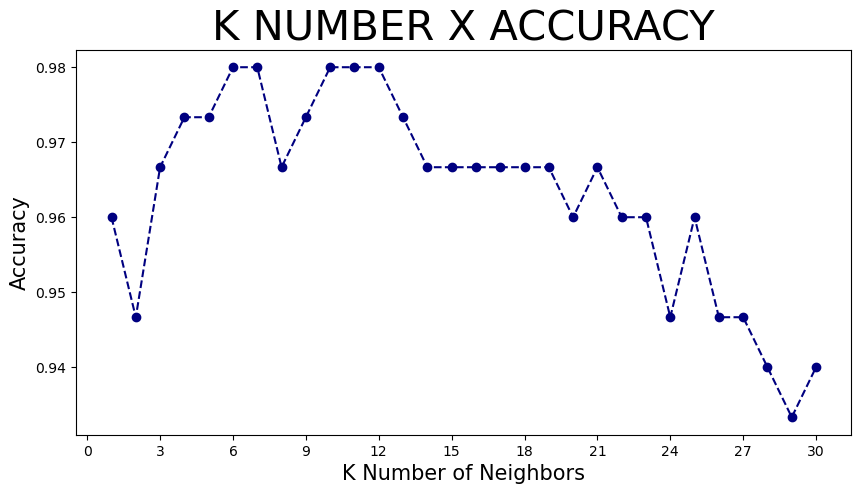

In [285]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()